In [1]:
import pandas as pd
from Models.LassoRegression import LassoRegression
from Models.RidgeRegression import RidgeRegression
from Models.RandomForestRegressor import RandomForestReg
from pipeline import Pipeline
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns


/tmp/ipykernel_10384/2572970555.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
2024-03-16 15:03:43.132 | INFO     | preprocessing.abstract_prep:<module>:5 - Successfully imported 'abstract_prep' file
2024-03-16 15:03:43.132 | INFO     | preprocessing.check_nans:<module>:6 - Successfully imported 'CheckNans' file
2024-03-16 15:03:43.134 | INFO     | preprocessing.minmax_scaler:<module>:8 - Successfully imported 'MinMaxScaler' file


In [2]:
data = pd.read_csv("Data/cleaned_data.csv")
X = data.drop("CREDIT_SCORE", axis=1)
y = data["CREDIT_SCORE"]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Catboost with Optuna

In [13]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import r2_score, mean_squared_error
# from helper import logger
# from preprocessing.minmax_scaler import MinMaxScaling

# # Load the data
# data = pd.read_csv("Data/cleaned_data.csv")

# # Split the data into features (X) and target variable (y)
# X = data.drop("CREDIT_SCORE", axis=1)
# y = data["CREDIT_SCORE"]

# # Instantiate MinMaxScaling class
# scaler = MinMaxScaling()

# # Fit and transform the data
# scaled_X = scaler.transform(X)

# # Split the scaled data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.2, random_state=42)

# # Initialize the linear regression model
# model = LinearRegression()

# # Train the model on the training data
# model.fit(X_train, y_train)

# # Make predictions on the testing data
# y_pred = model.predict(X_test)

# # Evaluate the model using R-squared and Mean Squared Error
# r2 = r2_score(y_test, y_pred)
# mse = mean_squared_error(y_test, y_pred)

# logger.info(f"R-squared Score: {r2}")
# logger.info(f"Mean Squared Error: {mse}")


In [14]:
# lasso_params = {
#     'alpha': (0.00001, 1),
#     'max_iter': (500000, 1000000),
#     'selection': ('cyclic', 'random')
# }
# rf_params = {
#     'n_estimators': (50, 100),
#     'criterion': ('poisson', 'squared_error', 'absolute_error', 'friedman_mse'),
#     'max_depth': (5, 20),
#     'min_samples_leaf': (1, 5),
#     'min_samples_split': (2, 10)
# }
# ridge_params = {
#     'alpha': (0.1, 1.0),
#     'max_iter': (50, 200)
# }


In [15]:
# optuna_hyperparameter_tuning(Lasso, lasso_params, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)
# optuna_hyperparameter_tuning(RandomForestRegressor, rf_params, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)
# optuna_hyperparameter_tuning(Ridge, ridge_params, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)


In [4]:
models = [
    (LassoRegression("LassoReg", alpha=0.000013, max_iter=58, selection="cyclic",random_state=42),'LassoRegression'), 
    (RandomForestReg('RandomForestRegressor', n_estimators=100, criterion='friedman_mse', max_depth= 20, min_samples_leaf=5, min_samples_split= 10,random_state=42),'RandomForestRegression'),
    (RidgeRegression("RidgeRegression", alpha = 0.49888557073491463, max_iter = 50, random_state=42), "RidgeRegression")
]
model_scores = []

for model, model_name in models:
    pipeline = Pipeline(data ,model)
    scores = pipeline.fit_transform()
    scores['Model'] = model_name
    model_scores.append(scores)
    
scores_df = pd.DataFrame(model_scores)
print(scores_df)

2024-03-16 15:03:56.102 | INFO     | pipeline:fit_transform:30 - Training the model
2024-03-16 15:03:56.106 | INFO     | pipeline:data_preprocessing:19 - Data Preprocessing
2024-03-16 15:03:56.107 | INFO     | preprocessing.check_nans:transform:14 - CheckNans is starting
2024-03-16 15:03:56.108 | INFO     | preprocessing.check_nans:transform:17 - No NaNs in dataframe
2024-03-16 15:03:56.109 | INFO     | preprocessing.minmax_scaler:fit:16 - _MinMaxScaler preprocessing class_ is fitting
2024-03-16 15:03:56.111 | INFO     | preprocessing.minmax_scaler:fit:19 - _MinMaxScaler preprocessing class_ fitting ended
2024-03-16 15:03:56.111 | INFO     | preprocessing.minmax_scaler:transform:38 - _MinMaxScaler preprocessing class_ is starting transformation
2024-03-16 15:03:56.115 | INFO     | preprocessing.minmax_scaler:transform:41 - _MinMaxScaler preprocessing class_ transformation ended
2024-03-16 15:03:56.185 | INFO     | preprocessing.check_and_remove_outliers:transform:31 - Number of outlier

        MAE       MSE      RMSE        R2      MAPE                   Model
0  0.039210  0.002976  0.054554  0.803754  0.077168         LassoRegression
1  0.048635  0.004699  0.068550  0.690148  0.108796  RandomForestRegression
2  0.039416  0.002993  0.054709  0.802639  0.080465         RidgeRegression


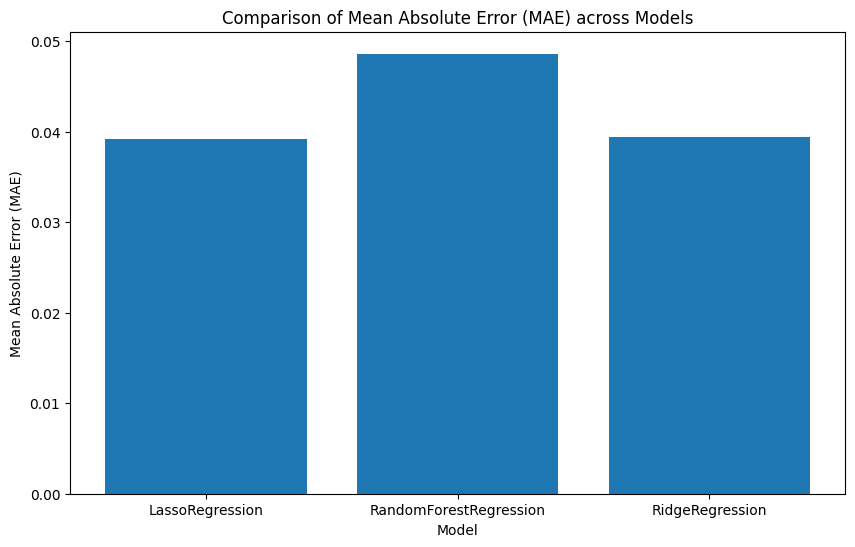

In [5]:
plt.figure(figsize=(10, 6))
plt.bar(scores_df['Model'], scores_df['MAE'])
plt.xlabel('Model')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Comparison of Mean Absolute Error (MAE) across Models')
plt.xticks(rotation=0)
plt.show()

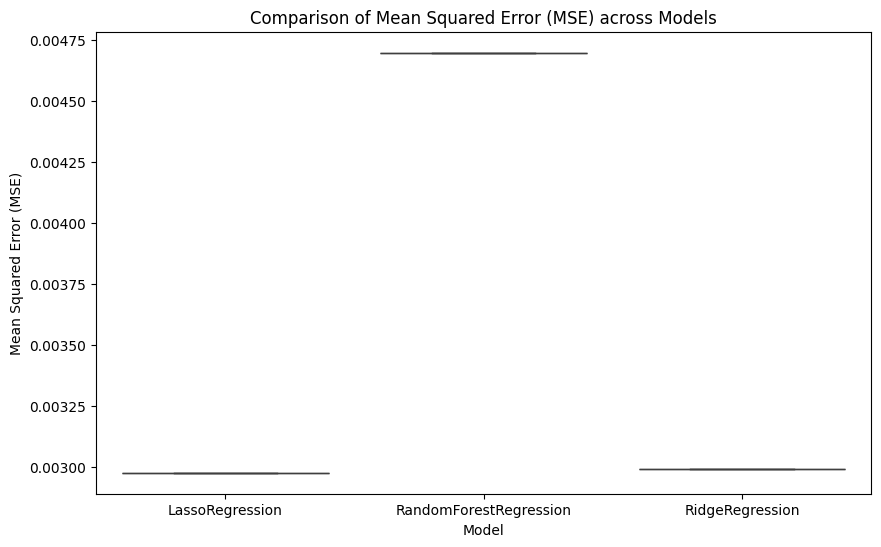

In [6]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Model', y='MSE', data=scores_df)
plt.xlabel('Model')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparison of Mean Squared Error (MSE) across Models')
plt.xticks(rotation=0)
plt.show()

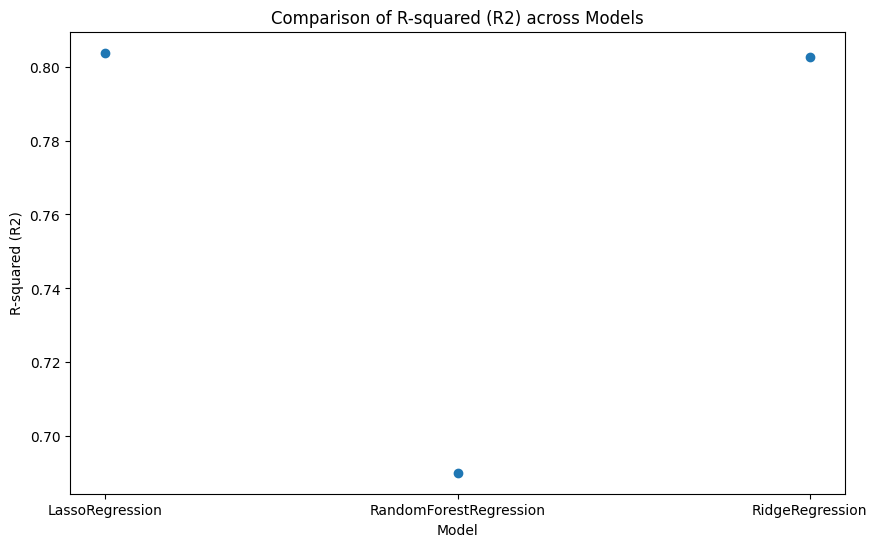

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(scores_df['Model'], scores_df['R2'])
plt.xlabel('Model')
plt.ylabel('R-squared (R2)')
plt.title('Comparison of R-squared (R2) across Models')
plt.xticks(rotation=0)
plt.show()

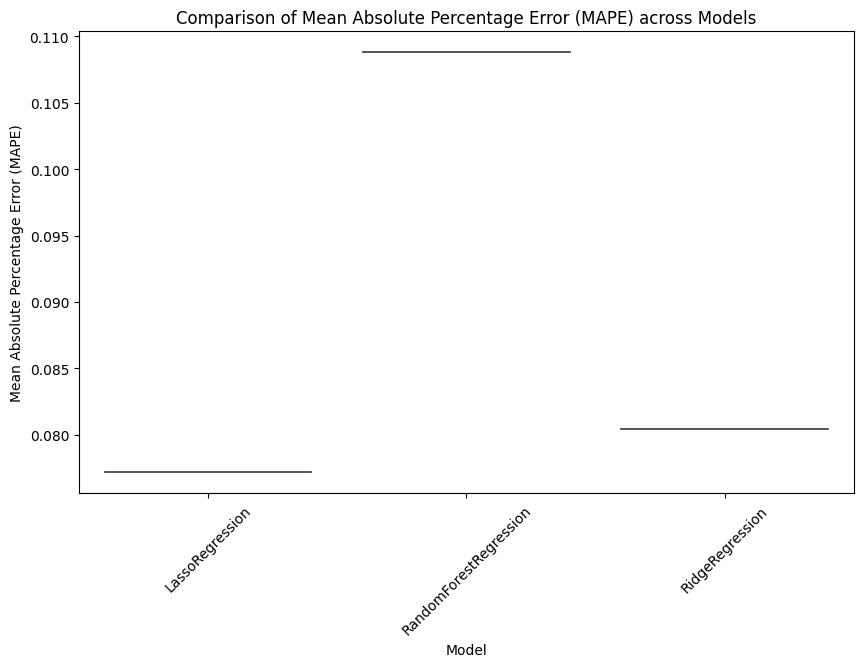

In [8]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Model', y='MAPE', data=scores_df)
plt.xlabel('Model')
plt.ylabel('Mean Absolute Percentage Error (MAPE)')
plt.title('Comparison of Mean Absolute Percentage Error (MAPE) across Models')
plt.xticks(rotation=45)
plt.show()

In [9]:
model_scores

[{'MAE': 0.03921036763184799,
  'MSE': 0.0029761576416414597,
  'RMSE': 0.05455417162455553,
  'R2': 0.8037544868373359,
  'MAPE': 0.0771675842337053,
  'Model': 'LassoRegression'},
 {'MAE': 0.048634793214640794,
  'MSE': 0.0046990582470451065,
  'RMSE': 0.06854967722057564,
  'R2': 0.6901477649671789,
  'MAPE': 0.1087958136849727,
  'Model': 'RandomForestRegression'},
 {'MAE': 0.03941617596024069,
  'MSE': 0.0029930813338632416,
  'RMSE': 0.054709060802240445,
  'R2': 0.8026385517745551,
  'MAPE': 0.08046461354220076,
  'Model': 'RidgeRegression'}]

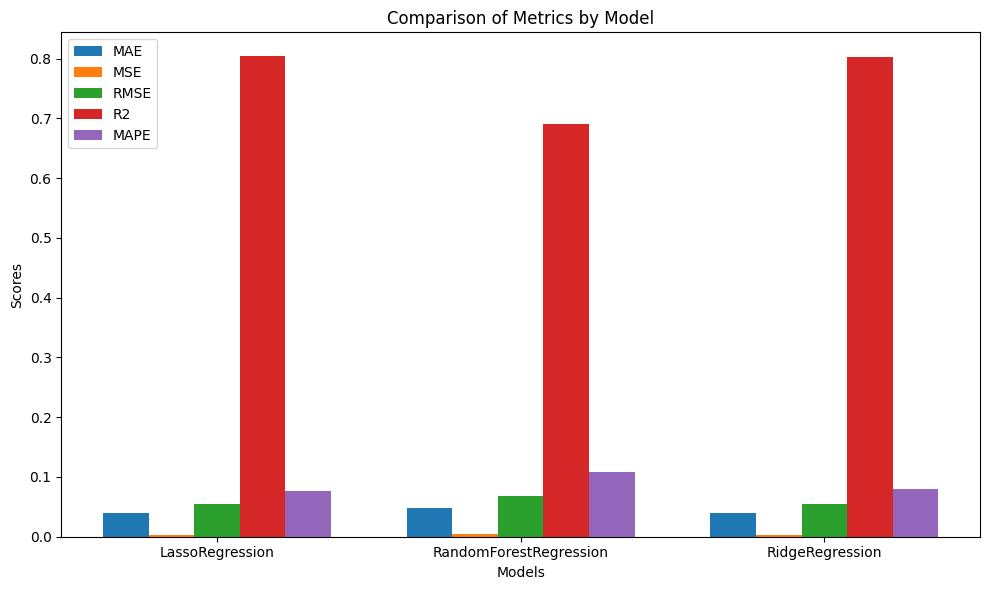

In [10]:
import matplotlib.pyplot as plt

# Extracting model names and metric scores
models = [d['Model'] for d in model_scores]
mae_scores = [d['MAE'] for d in model_scores]
mse_scores = [d['MSE'] for d in model_scores]
rmse_scores = [d['RMSE'] for d in model_scores]
r2_scores = [d['R2'] for d in model_scores]
mape_scores = [d['MAPE'] for d in model_scores]

# Plotting the metrics
fig, ax = plt.subplots(figsize=(10, 6))
index = range(len(models))
bar_width = 0.15

bar1 = ax.bar(index, mae_scores, bar_width, label='MAE')
bar2 = ax.bar([p + bar_width for p in index], mse_scores, bar_width, label='MSE')
bar3 = ax.bar([p + 2 * bar_width for p in index], rmse_scores, bar_width, label='RMSE')
bar4 = ax.bar([p + 3 * bar_width for p in index], r2_scores, bar_width, label='R2')
bar5 = ax.bar([p + 4 * bar_width for p in index], mape_scores, bar_width, label='MAPE')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Metrics by Model')
ax.set_xticks([p + 2 * bar_width for p in index])
ax.set_xticklabels(models)
ax.legend()

plt.tight_layout()
plt.show()


In [11]:
import seaborn as sns
import pandas as pd

# Convert data to a DataFrame
df = pd.DataFrame(data)

# Melt the DataFrame to plot multiple metrics in one boxplot
df_melted = pd.melt(df, id_vars=['Model'], value_vars=['MAE', 'MSE', 'RMSE', 'R2', 'MAPE'],
                     var_name='Metric', value_name='Score')

# Plotting boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Metric', y='Score', hue='Model', data=df_melted)
plt.title('Boxplot of Metrics by Model')
plt.ylabel('Scores')
plt.legend(title='Model', loc='upper left')
plt.show()


KeyError: "The following id_vars or value_vars are not present in the DataFrame: ['Model', 'MAE', 'MSE', 'RMSE', 'R2', 'MAPE']"

ValueError: Could not interpret value `Model` for `x`. An entry with this name does not appear in `data`.

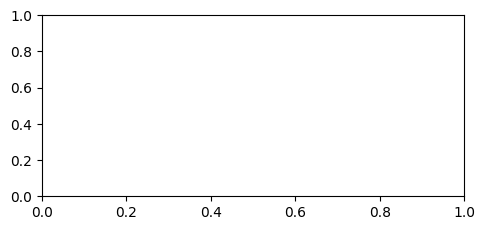

In [12]:
metrics = ['MAE', 'MSE', 'RMSE', 'R2', 'MAPE']

plt.figure(figsize=(12, 8))
for i, metric in enumerate(metrics):
    plt.subplot(3, 2, i+1)
    sns.barplot(x='Model', y=metric, data=df)
    plt.title(f'{metric} by Model')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
